###1. Загрузка пакетов - библиотек

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU
%matplotlib inline
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix

###2. Загрузка данных

In [5]:
csv_url = "https://raw.githubusercontent.com/Daria-Chernykh/iad-lab1/refs/heads/main/V4.csv"
df = pd.read_csv(csv_url)


###3. Описательная статистика

In [6]:
df.head()

,Unnamed: 0,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0.0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0.0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,NaN,43,53798.55112,11160.355060,638467.1773,42925.70921
3,3,Jade Cunningham,malesuada@dignissim.com,USA,NaN,58,79370.03798,14426.164850,548599.0524,67422.36313
4,4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1.0,57,59729.15130,5358.712177,560304.0671,55915.46248


Каждая строка представляет одного клиента, который потенциально заинтересован в покупке автомобиля.
Имеется 10 атрибутов:

1. Unnamed: 0 — порядковый номер записи;
2. Customer Name — имя клиента;
3. Customer e-mail — адрес электронной почты клиента;
4. Country — страна проживания клиента;
5. Gender — пол клиента (0 — мужчина, 1 — женщина, возможны пропуски);
6. Age — возраст клиента (в годах);
7. Annual Salary — годовой доход клиента;
8. Credit Card Debt — сумма задолженности по кредитной карте;
9. Net Worth — собственный капитал клиента (разница между активами и долгами);
10. Car Purchase Amount — целевой признак, отражающий ожидаемую сумму покупки автомобиля.

Таким образом, каждая строка описывает одного покупателя с финансовыми и демографическими характеристиками, на основании которых требуется построить регрессионную модель для прогноза значения Car Purchase Amount.

In [9]:
# Используем метод info( ) для получения краткого описания данных, в частности общего числа строк, а также типов и количества ненулевых значений каждого атрибута
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           500 non-null    int64  
 1   Customer Name        500 non-null    object 
 2   Customer e-mail      500 non-null    object 
 3   Country              500 non-null    object 
 4   Gender               244 non-null    float64
 5   Age                  500 non-null    int64  
 6   Annual Salary        500 non-null    float64
 7   Credit Card Debt     500 non-null    float64
 8   Net Worth            500 non-null    float64
 9   Car Purchase Amount  500 non-null    float64
dtypes: float64(5), int64(2), object(3)
memory usage: 39.2+ KB


В наборе данных 500 наблюдений и 10 признаков.  
Из них 7 числовых и 3 текстовых, включая категориальный признак Country.  

Все атрибуты набора данных, кроме Customer Name, Customer e-mail и Country, являются числовыми.
Эти три поля имеют тип object, поэтому могут содержать произвольные объекты Python, но поскольку данные были загружены из CSV-файла, ясно, что данные атрибуты являются текстовыми.

Атрибут Customer Name содержит имена клиентов,

Customer e-mail — адреса электронной почты,

а Country — страну проживания.

Значения в столбце Country повторяются, следовательно, этот признак является категориальным.
С помощью метода value_counts() можно определить, какие страны встречаются в наборе данных и сколько записей относится к каждой из них.

Остальные признаки — числовые:

* Gender — категориальный числовой признак (0 — мужчина, 1 — женщина), в нём имеются пропуски, которые следует обработать;
* Age — целочисленный признак, отражающий возраст клиента;
* Annual Salary — вещественный признак, годовой доход клиента;
* Credit Card Debt — вещественный признак, текущая задолженность по кредитной карте;
* Net Worth — вещественный признак, характеризующий собственный капитал (разница между активами и долгами);
* Car Purchase Amount — вещественный целевой признак, отражающий сумму покупки автомобиля, которую необходимо спрогнозировать.

Кроме перечисленных признаков, в наборе данных присутствует столбец Unnamed: 0, который представляет собой порядковый номер строки. Этот атрибут не несёт информативной нагрузки и будет удалён из дальнейшего анализа.

In [12]:
# Проверим значения признака "Country"
df["Country"].value_counts()

,count
Country,
USA,500


С помощью метода value_counts() видно, что все записи относятся к одной стране — USA.
Поскольку страна в данном наборе одна, признак Country не будет информативным и может быть исключён из дальнейшего анализа.
Таким образом, для построения модели можно оставить только числовые признаки и категориальный признак Gender (после его очистки и кодирования).

In [14]:
# Посмотрим сводку по числовым атрибутам
df.describe()

,Unnamed: 0,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,244.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,249.500000,0.500000,46.224000,62127.239608,9607.645049,431475.713625,44209.799218
std,144.481833,0.501028,7.990339,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,124.750000,0.000000,41.000000,54391.977195,7397.515792,299824.195900,37629.896040
50%,249.500000,0.500000,46.000000,62915.497035,9655.035568,426750.120650,43997.783390
75%,374.250000,1.000000,52.000000,70117.862005,11798.867487,557324.478725,51254.709517
max,499.000000,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


Метод describe() показал сводку по основным числовым признакам.
Количество непустых значений (count) для всех признаков, кроме Gender, составляет 500, что подтверждает отсутствие пропусков. Для Gender присутствуют пропущенные значения, так как count меньше 500.

Средние значения (mean) указывают, что средний возраст клиентов составляет примерно 45 лет,
средний годовой доход — около 65 000,
а средняя задолженность по кредитной карте — около 10–11 000.
Средний собственный капитал (Net Worth) находится в диапазоне 500–600 тыс.,
а средняя сумма покупки автомобиля (Car Purchase Amount) — около 45–50 тыс.

Показатель std (стандартное отклонение) показывает значительный разброс:
особенно велик разброс для признаков Net Worth и Car Purchase Amount, что говорит о сильной вариативности платежеспособности клиентов и стоимости приобретаемых автомобилей.

Значения 25%, 50% и 75% (процентили) показывают, что большая часть клиентов имеет доход между ~50 000 и ~80 000,
а собственный капитал большинства лежит между ~300 000 и ~700 000.
Таким образом, распределения признаков Annual Salary, Credit Card Debt и Net Worth сдвинуты вправо, что типично для финансовых данных.

Дополнительно стоит отметить, что минимальные и максимальные значения некоторых признаков являются округлёнными целыми числами,
что может указывать на предварительное усечение данных: значения ниже минимума и выше максимума могли быть приведены к граничным значениям.
Подобная особенность снижает вариативность данных на краях распределения и может незначительно повлиять на обучение модели, особенно при использовании методов, чувствительных к выбросам.

###4. Визуализация данных

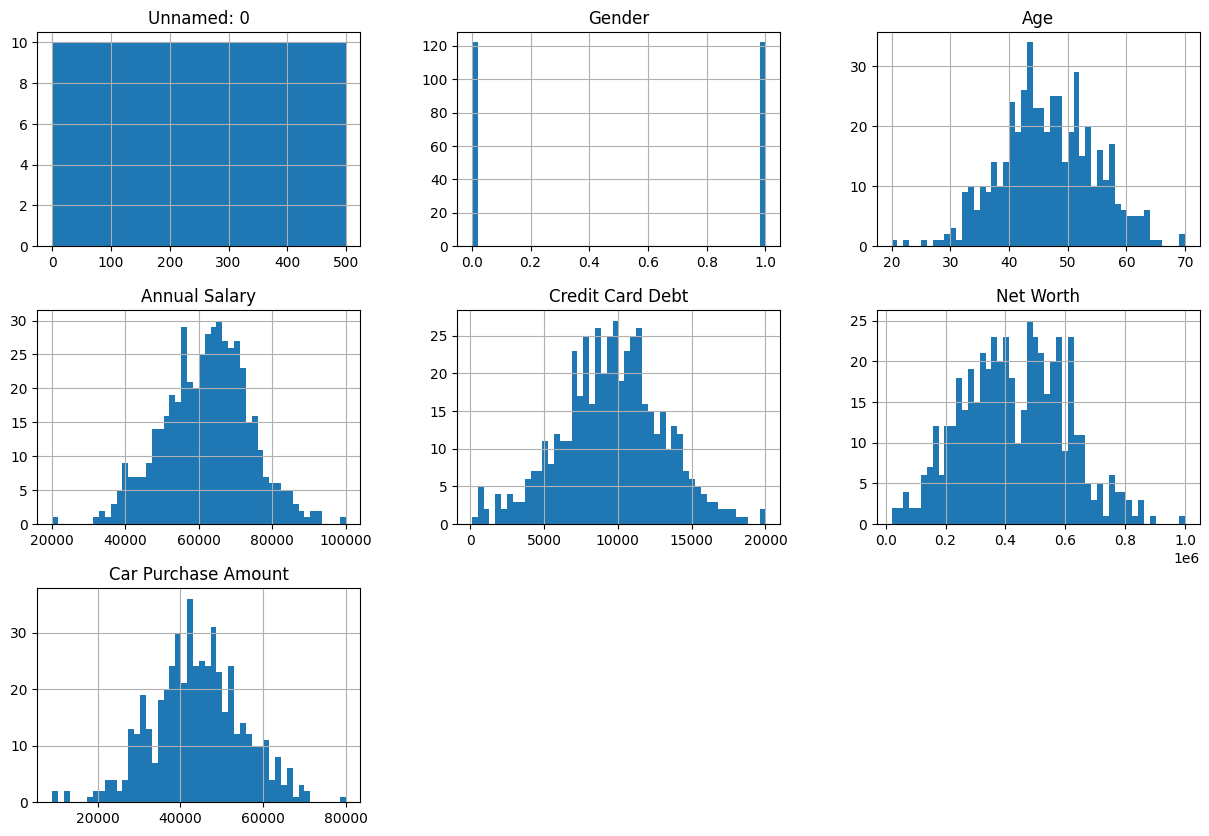

In [19]:
# Гистограммы
df.hist(bins=50, figsize=(15, 10))
plt.show()

На этих гистограммах можно заметить несколько особенностей:

- Атрибут Unnamed: 0 представляет собой порядковый номер записи, равномерно распределённый от 0 до 499. Этот столбец является техническим и не несёт смысловой нагрузки.

- Признак Gender имеет два выраженных пика около значений 0 и 1, что соответствует бинарной природе признака.

- Возраст (Age) имеет распределение, близкое к нормальному, с пиком примерно в диапазоне 40–45 лет. Это говорит о том, что основная часть клиентов — люди среднего возраста.

- Признаки Annual Salary, Credit Card Debt и Car Purchase Amount демонстрируют почти симметричные распределения, приближённые к нормальным. Это указывает на хорошо сбалансированное распределение финансовых показателей — большая часть клиентов сосредоточена вблизи средних значений, без ярко выраженных перекосов.

- Распределение Net Worth имеет лёгкий правый хвост, что отражает наличие небольшой доли клиентов с существенно более высоким собственным капиталом по сравнению с основной массой выборки.

- Минимальные и максимальные значения некоторых признаков являются округлёнными целыми числами, что может свидетельствовать о предварительном усечении данных: значения за пределами диапазона были приведены к границам.

- Все числовые признаки имеют различные масштабы измерений (возраст — десятки, доход — десятки тысяч, капитал — сотни тысяч), поэтому для корректного обучения модели потребуется выполнить масштабирование данных.

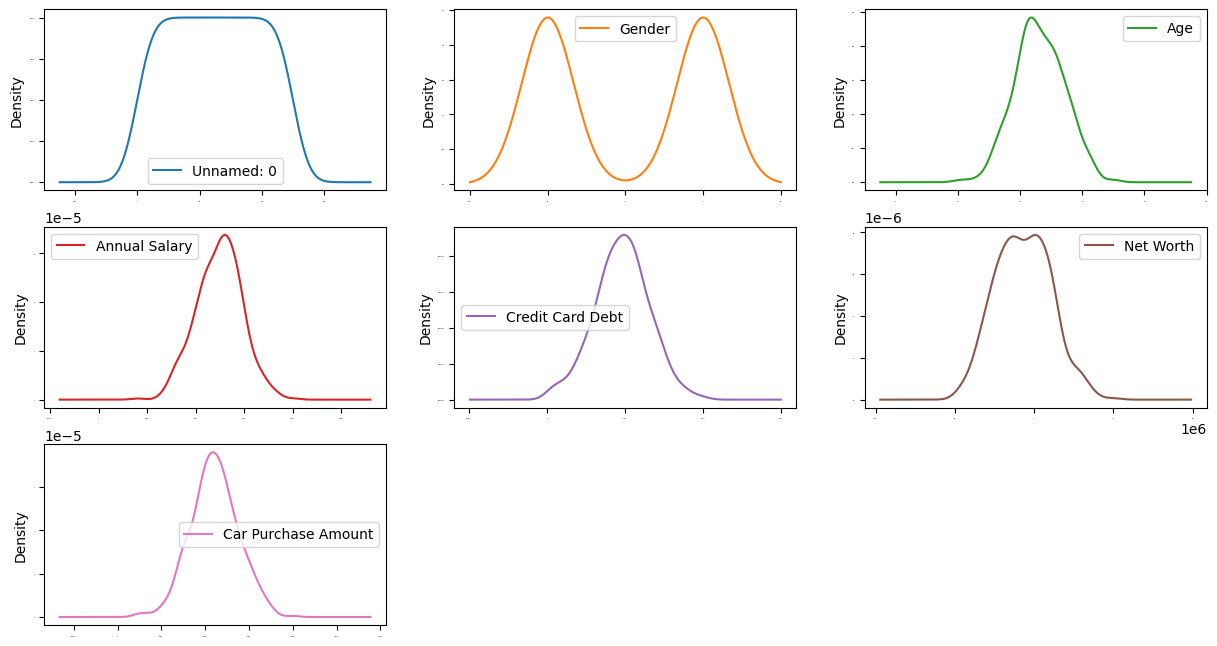

In [22]:
# Графики плотности
df.plot(kind='density', subplots=True, layout=(3, 3), sharex=False, legend=True, fontsize=1, figsize=(15, 8))
plt.show()

Построенные графики плотности подтверждают выводы, сделанные по гистограммам.
Финансовые признаки (Annual Salary, Credit Card Debt, Car Purchase Amount) имеют симметричную форму, близкую к нормальному распределению,
что указывает на отсутствие выраженных выбросов и сбалансированность данных.

Распределение признака Net Worth имеет лёгкую правую асимметрию и, возможно, бимодальность, что может отражать существование двух групп клиентов по уровню капитала.
Признак Age немного скошен влево, а признаки Gender и Unnamed: 0 не несут полезной информации для регрессии.

Таким образом, графики плотности позволяют убедиться, что данные не содержат сильных искажений,
и могут быть использованы для дальнейшего построения моделей после масштабирования.

                       Gender       Age  Annual Salary  Credit Card Debt  \
Gender               1.000000 -0.075433      -0.086267         -0.026488   
Age                 -0.075433  1.000000       0.000361          0.031748   
Annual Salary       -0.086267  0.000361       1.000000          0.049599   
Credit Card Debt    -0.026488  0.031748       0.049599          1.000000   
Net Worth           -0.061409  0.021794       0.014767         -0.049378   
Car Purchase Amount -0.120372  0.633273       0.617862          0.028882   

                     Net Worth  Car Purchase Amount  
Gender               -0.061409            -0.120372  
Age                   0.021794             0.633273  
Annual Salary         0.014767             0.617862  
Credit Card Debt     -0.049378             0.028882  
Net Worth             1.000000             0.488580  
Car Purchase Amount   0.488580             1.000000  


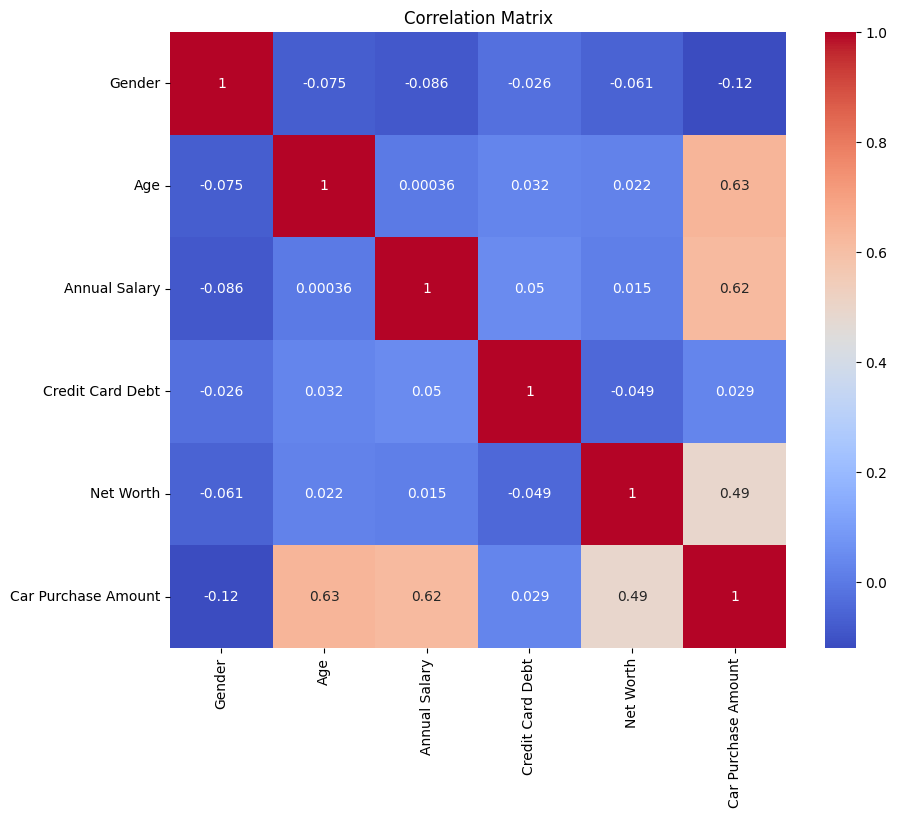

,Car Purchase Amount
Car Purchase Amount,1.000000
Age,0.633273
Annual Salary,0.617862
Net Worth,0.488580
Credit Card Debt,0.028882
Gender,-0.120372


In [39]:
# Исключаем нечисловые и неинформативные признаки
df_corr = df.drop(columns=["Unnamed: 0", "Customer Name", "Customer e-mail", "Country"])

# Корреляционная матрица Пирсона
corr_matrix = df_corr.corr()

# Отображение в виде таблицы
print(corr_matrix)

# Тепловая карта
plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix')
sns.heatmap(corr_matrix, vmax=1, square=True, annot=True, cmap="coolwarm")
plt.show()

# Поиск корреляционной зависимости с целевым признаком
corr_matrix = df_corr.corr()
corr_matrix["Car Purchase Amount"].sort_values(ascending=False)

### Анализ корреляционной матрицы

Корреляционная матрица показывает линейные взаимосвязи между числовыми признаками.  
Наибольшая положительная корреляция с целевым признаком Car Purchase Amount наблюдается у:

- Age (r ≈ 0.63) — клиенты старшего возраста, как правило, готовы потратить больше на покупку автомобиля;  
- Annual Salary (r ≈ 0.62) — более высокий доход напрямую связан с большей стоимостью приобретаемого автомобиля;  
- Net Worth (r ≈ 0.49) — больший собственный капитал также повышает платёжеспособность клиента.  

Признаки Credit Card Debt (r ≈ 0.03) и Gender (r ≈ –0.12) практически не влияют на целевую переменную.  
Кроме того, между Age и Annual Salary корреляция близка к нулю (r ≈ 0.00),  
что означает отсутствие линейной зависимости между возрастом и доходом в этой выборке.  

Таким образом, ключевыми предикторами стоимости автомобиля являются возраст, уровень дохода и собственный капитал клиента,  
а остальные признаки можно считать вспомогательными или неинформативными.

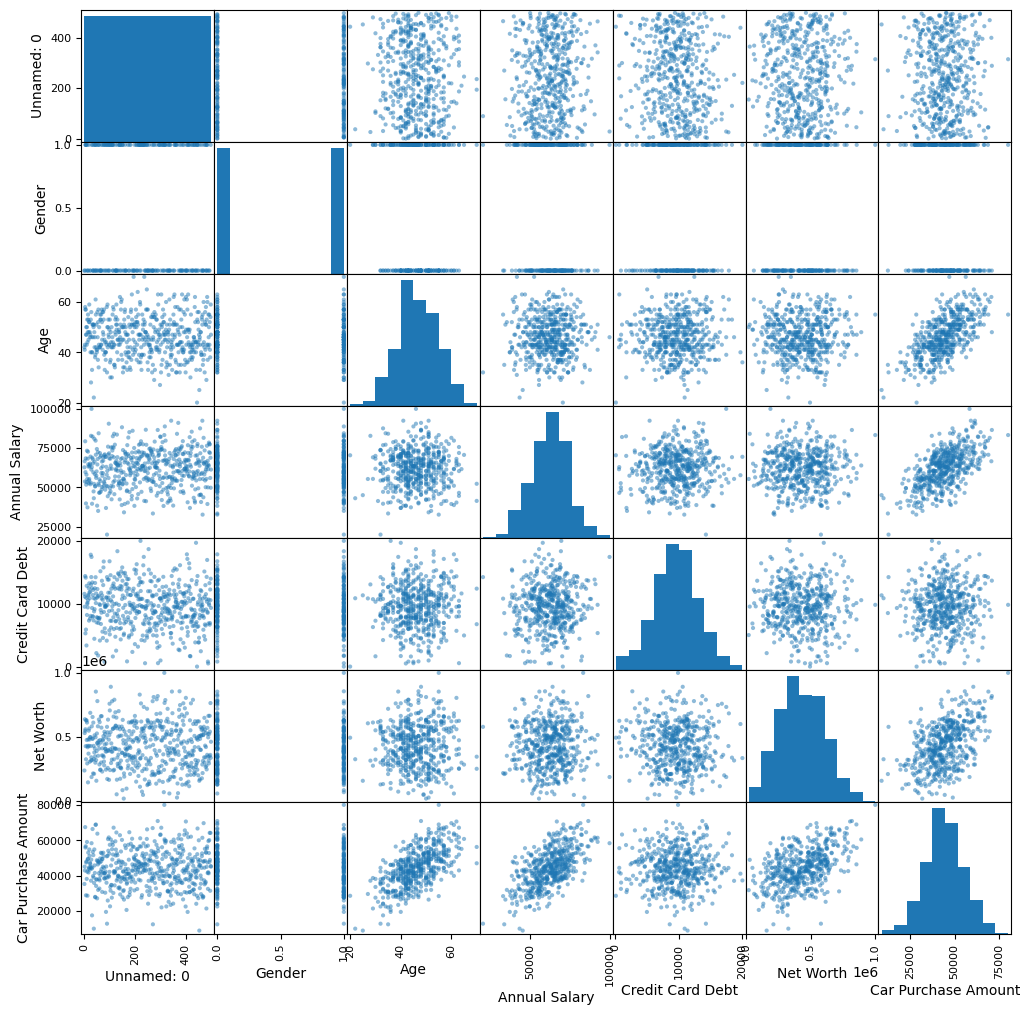

In [35]:
# Матрица диаграммы рассеяния
scatter_matrix(df, figsize=(12,12))
plt.show()

Матрица диаграмм рассеяния визуализирует зависимости между числовыми признаками и подтверждает выводы из корреляционной матрицы.

- Car Purchase Amount — Age: отчётливая восходящая зависимость, сумма покупки увеличивается с возрастом клиента.  
- Car Purchase Amount — Annual Salary: почти линейная положительная связь, клиенты с более высоким доходом приобретают автомобили дороже.  
- Car Purchase Amount — Net Worth: заметная, но менее выраженная положительная зависимость — чем больше капитал, тем выше сумма покупки.  
- Car Purchase Amount — Credit Card Debt: облако точек хаотично, зависимости нет.  
- Gender: две вертикальные полосы (0 и 1), без различий в распределении целевой переменной.  
- Unnamed: 0: равномерное распределение индекса, не несёт смысловой информации.  

В целом, визуальный анализ подтверждает, что основное влияние на стоимость автомобиля оказывают возраст, доход и собственный капитал, тогда как прочие признаки можно исключить из дальнейшего моделирования.